# Poceni Pythonska Pojedina
## Seminarska naloga


### Pridobivanje podatkov
Podatke pridobljene s pomo[ch]jo `mercator_scraper.py` in pa `okusno_scraper.py` najprej uvozimo za uporabo pri analizi. Glede enot: [ch]asi so v minutah, dol[zh]ina navodil je v [sh]tevilu znakov. Vse hranilne snovi in energijsko vrednost obravnavamo za 100g jedi. Le-ta je v KJ; beljakovine, ma[sh][ch]obe, ogljikovi hidrati in pa vlaknine so v gramih, ter vitamin D je mednarodnih enotah (iu).

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

recepti = pd.read_csv("data/recepti.csv")
recepti.head(10)

,Ime jedi,Avtor,Cas priprave,Cas kuhanja,Skupen cas,Dolzina navodil,Energijska vrednost,Beljakovine,Ogljikovi hidrati,Mascobe,Vlaknine,Vitamin D,CSV
0,Zelenjavna enolončnica z omako pistou,M.J.,15,40,55,1276,315.98,1.80,11.00,2.21,1.36,0.00,zelenjavna-enoloncnica-z-omako-pistou
1,Pecivo z malinami in pudingom,Su.S.,20,40,60,1290,1260.01,6.38,60.20,2.67,0.74,0.30,torta-z-malinami-in-pudingom
2,Polnjeni lignji s pršutom in sirom,Sanja Sirk,15,35,50,1525,579.02,15.07,2.62,6.46,0.09,0.00,polnjeni-lignji-s-prsutom-in-sirom
3,Kumare v omaki,M. J.,10,30,40,1116,145.44,0.16,3.97,1.59,0.24,0.00,kumare-v-omaki
4,Grška krompirjeva musaka,M. J.,20,90,110,2125,654.54,7.66,9.00,9.33,1.02,0.04,grska-krompirjeva-musaka
5,Breskove rezine,Su.S.,35,55,90,836,910.40,2.34,30.44,9.15,0.93,0.16,breskove-rezine
6,Bučkin wrap s tuninim nadevom,Su.S.,25,25,50,886,384.47,6.62,3.17,4.97,0.55,0.28,buckin-wrap-s-tuninim-nadevom
7,Hitri skutini cmoki s sadjem,M. J.,55,10,65,925,463.34,5.15,17.01,1.37,0.77,0.09,hitri-skutini-cmoki-s-sadjem
8,Tiramisu semifreddo,M. J.,40,240,280,1712,1307.58,9.39,38.02,12.58,1.55,0.48,tiramisu-semifreddo
9,Kremna limonina pita brez peke,Su.S.,15,0,15,696,1946.77,16.39,34.01,28.68,0.82,5.00,kremna-limonina-pita-brez-peke


[Zh]e samo iz te tabele lahko izklu[sh]imo veliko informacij. Kak[sh]na je odvisnost med [ch]asom kuhanja in pa energijsko vrednostjo jedi? Kaj pa med energijsko vrednostjo ter vsebnostjo raznoraznih hranilnih snovi, npr. ali imajo kalori[ch]no bogatej[sh]e jedi ve[ch] ma[sh][ch]ob? Kaj pa ogljikovih hidratov? Za za[ch]etek si poglejmo pogostost zapletenih receptov in energijsko bogatih jedi.

Povpre[ch]na energijska vrednost je: 901.78 KJ
Povpre[ch]na dol[zh]ina besedila je: 1208.94 znakov


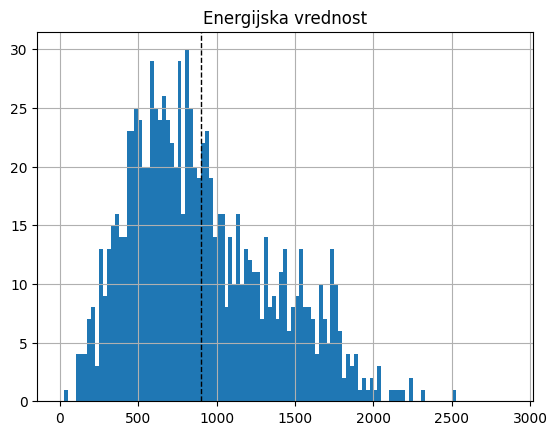

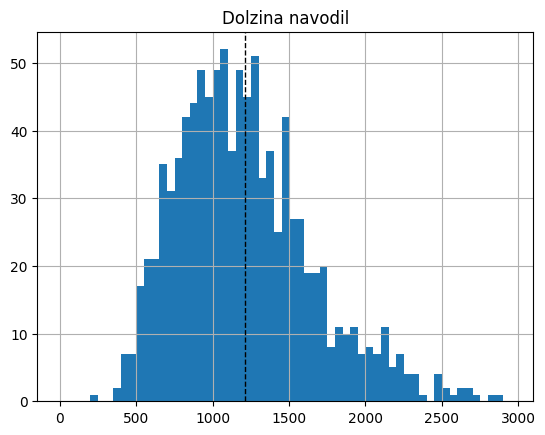

In [2]:
en_mean = recepti["Energijska vrednost"].mean()
recepti.hist("Energijska vrednost", bins = range(1,2900, 25))
plt.axvline(en_mean, color='k', linestyle='dashed', linewidth=1)
print("Povpre[ch]na energijska vrednost je: " + "{:.2f}".format(en_mean) + " KJ")

dol_mean = recepti["Dolzina navodil"].mean()
recepti.hist("Dolzina navodil",bins = range(1,3000,50))
plt.axvline(dol_mean, color='k', linestyle='dashed', linewidth=1)
print("Povpre[ch]na dol[zh]ina besedila je: " + "{:.2f}".format(dol_mean) + " znakov")



No pa si poglejmo [sh]e odvisnost med energijsko vrednostjo jedi in njihovimi makronutrienti.

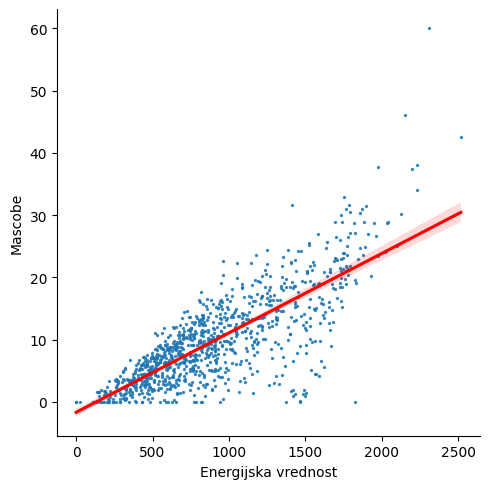

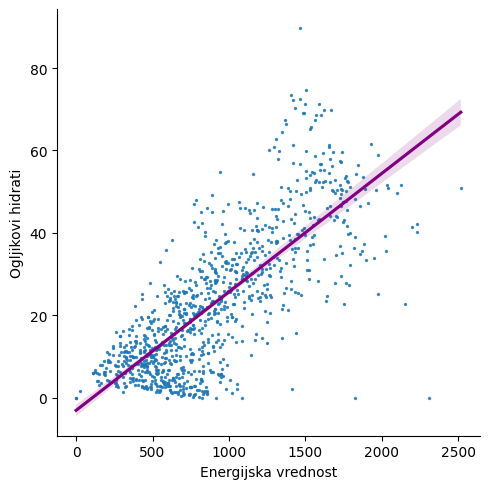

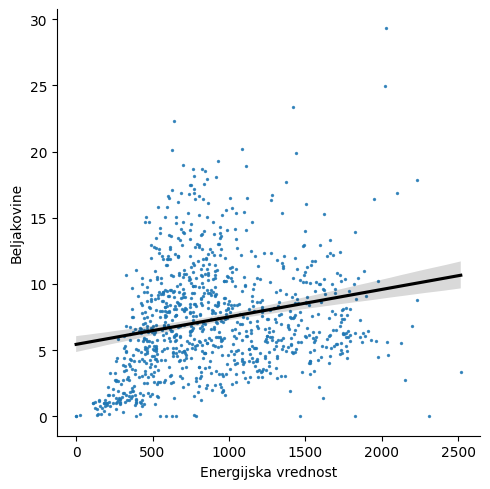

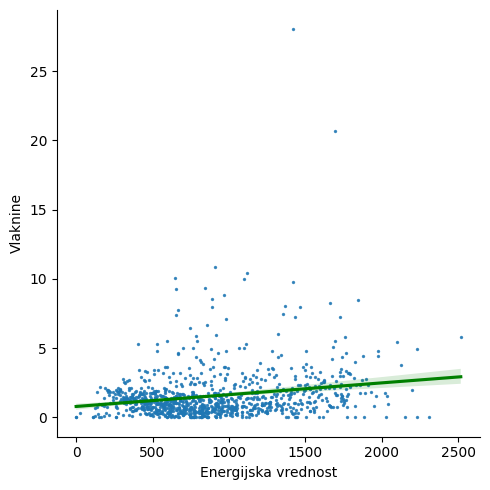

In [3]:
sns.lmplot(x="Energijska vrednost",y="Mascobe",data=recepti,fit_reg=True, line_kws={'color': 'red'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Ogljikovi hidrati",data=recepti,fit_reg=True, line_kws={'color': 'purple'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Beljakovine",data=recepti,fit_reg=True, line_kws={'color': 'black'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Vlaknine",data=recepti,fit_reg=True, line_kws={'color': 'green'},scatter_kws={"s": 2}) 

Opazimo dokaj mo[ch]no pozitivno korelacijo med energijsko vrednostjo in koli[ch]ino ma[sh][ch]ob,ogljikovih hidratov ter do neke mere vlaknin, ki so posebne v tem da jih je v vseh jedeh dokaj malo. Za beljakovine pa je graf dokaj raztresen, tako da v tem primeru linearna regresija ni najbolj uporabna metoda. Izgleda da so nekatere jedi bogate z beljakovinami, [ch]eprav so relativno kalori[ch]no puste - morda so le-te raj za atlete?

Obrnimo na[sh]o pozornost na dol[zh]ino priprave jedi. Mar so jedi z dalj[sh]im [ch]asom priprave bolj zapletena za pripravo? Morda je [ch]as priprave ponavadi dalj[sh]i od [ch]asa kuhanja? Tukaj bomo za proxy te[zh]avnosti uporabili kar dol[zh]ino recepta, torej privzemamo da so recepti z dalj[sh]imi navodili priprave tudi bolj komplicirani za pripravo.

Povpre[ch]en [ch]as priprave je: 25.59 min.
Povpre[ch]en [ch]as kuhanja je: 35.49 min.


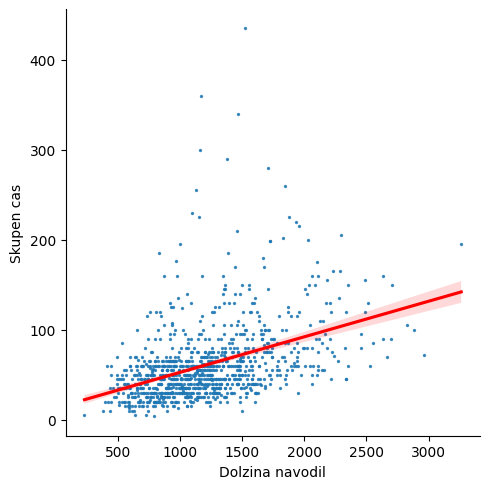

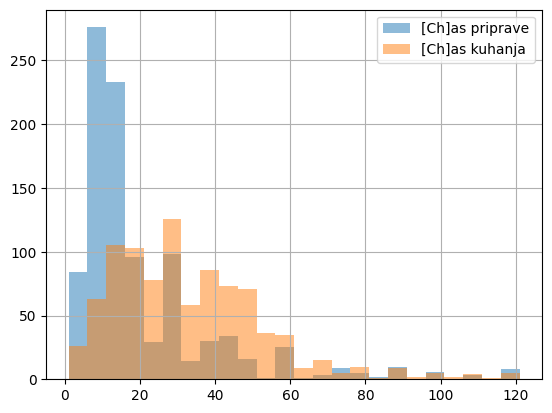

<Axes: xlabel='Energijska vrednost', ylabel='Skupen [ch]as'>

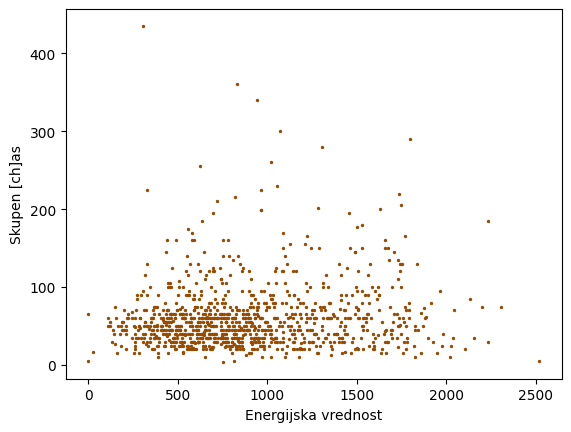

In [20]:
sns.lmplot(x="Dolzina navodil",y="Skupen cas",data=recepti,fit_reg=True, line_kws={'color': 'red'},scatter_kws={"s": 2}) 
print("Povpre[ch]en [ch]as priprave je: " + "{:.2f}".format(recepti["Cas priprave"].mean()) + " min.")
print("Povpre[ch]en [ch]as kuhanja je: " +  "{:.2f}".format(recepti["Cas kuhanja"].mean()) + " min.")

# truncatamo nekaj outlierjev zavoljo boljse preglednosti
recepti.hist("Cas priprave", bins=range(1,125,5), alpha=0.5, label='[Ch]as priprave')
plt.hist(recepti["Cas kuhanja"], bins=range(1,125,5), alpha=0.5, label='[Ch]as kuhanja')
plt.legend(loc='upper right')
plt.title("")
plt.show()

# relacija med casom kuhe in kaloricno vrednostjo
recepti.plot.scatter(y="Skupen cas",x="Energijska vrednost", color = "#964B00", s=2, ylabel="Skupen [ch]as") 

Opazimo pozitivno korelacijo med dol[zh]ino navodil ter skupnim [ch]asom kuhanja, izgleda da bolj komplicirani recepti ponavadi vendarle zahtevajo dlje [ch]asa za izvedbo. Prav tako vidimo, da ve[ch]inoma [ch]as priprave ne presega 20 minut, [ch]as kuhanja pa se pogosto zavlece tudi do kak[sh]ne ure, torej [ch]as priprave ponavadi ni najve[ch]ja ovira pri kuhanju. Jasne korelacije med energijsko vrednostjo in skupnim [ch]asom ni mo[ch] opaziti. Oglejmo si [sh]e statistiko piscev na [Okusno.Je](https://okusno.je/). 

In [5]:
recepti.groupby("Avtor").agg("size").sort_values(ascending=False).head(10)

Avtor
M. J.            475
Su.S.            157
M.J.             137
Sanja Sirk       100
Kristina Turk     16
Su. S.            15
T. G.             10
Tjaša Ribič       10
MasterChef         8
Bruno Šulman       8
dtype: int64

Vidimo lahko, da je razmeroma malo avtorjev odgovornih za ve[ch]ino receptov na [Okusno.Je](https://okusno.je/). [Ch]e upo[sh]tevamo, da sta `M.J.` in `M. J.` ter `Su.S.` in `Su. S.` o[ch]itno isti osebi, je prvih 8 avtorjev odgovornih za 936 od 1000 receptov! Poglejmo si vodilna `M. J.` in `Su.S.` podrobneje.

In [6]:
print("Povprecen cas peke avtorja M.J.: " + "{:.2f}".format(recepti[recepti["Avtor"] == "M. J."]["Skupen cas"].mean()) + " min")
print("Povprecen cas peke avtorja Su.S.: " + "{:.2f}".format(recepti[recepti["Avtor"] == "Su.S."]["Skupen cas"].mean()) + " min")
print("Povprecen kaloricna vrednost avtorja M.J.: " + "{:.2f}".format(recepti[recepti["Avtor"] == "M. J."]["Energijska vrednost"].mean()) + " KJ")
print("Povprecen kaloricna vrednost avtorja Su.S.: " + "{:.2f}".format(recepti[recepti["Avtor"] == "Su.S."]["Energijska vrednost"].mean()) + " KJ")
print("Povprecna kolicina proteinov avtorja M.J.: " + "{:.2f}".format(recepti[recepti["Avtor"] == "M. J."]["Beljakovine"].mean()) + " g")
print("Povprecna kolicina proteinov avtorja Su.S.: " + "{:.2f}".format(recepti[recepti["Avtor"] == "Su.S."]["Beljakovine"].mean()) + " g")
print("Povprecna kolicina mascob avtorja M.J.: " + "{:.2f}".format(recepti[recepti["Avtor"] == "M. J."]["Mascobe"].mean()) + " g")
print("Povprecna kolicina mascob avtorja Su.S.: " + "{:.2f}".format(recepti[recepti["Avtor"] == "Su.S."]["Mascobe"].mean()) + " g")

Povprecen cas peke avtorja M.J.: 57.09 min
Povprecen cas peke avtorja Su.S.: 56.67 min
Povprecen kaloricna vrednost avtorja M.J.: 889.12 KJ
Povprecen kaloricna vrednost avtorja Su.S.: 972.13 KJ
Povprecna kolicina proteinov avtorja M.J.: 7.13 g
Povprecna kolicina proteinov avtorja Su.S.: 7.77 g
Povprecna kolicina mascob avtorja M.J.: 9.99 g
Povprecna kolicina mascob avtorja Su.S.: 10.95 g


Zgleda da sta si najbolj proliferi[ch]na avtorja kar jih [Okusno.Je](https://okusno.je/) premore med sabo dokaj podobna. [Ch]as peke, koli[ch]ina ma[sh][ch]ob in beljakovin sta skoraj [ch]e ne identi[ch]ni, so pa `Su.S.` jedi rahlo energijsko bogatej[sh]e.

## Mercator analiza

Dober recept je seveda vitalna komponenta pred vsako ekskurzijo v kuhinjo, druga polovica pa seveda pride iz dobrih sestavin (v tem idealiziranem pogledu malenkosti kot so trenje in na[sh]e kuharske sposobnosti zanemarimo). Ker ima lokalen [Tu[sh]](https://www.tus.si/trgovina/?woof_text=) majhno ponudbo, najbli[zh]ji [Spar](https://www.spar.si/online/search/?q=&query=*&hitsPerPage=72&substringFilter=pos-visible:81701&q1=&x1=product-lifestyleInf) pa vse izdelke prikazuje z dinami[ch]nim JavaScriptom, se po nakupih sprehodimo v [Mercatorjevo spletno trgovino](https://www.mercatoronline.si/sl/search). Oglejmo si torej nekaj dejstev o izdelkih, ki jih ponuja Mercator. 

array([[<Axes: title={'center': 'Cena'}>]], dtype=object)

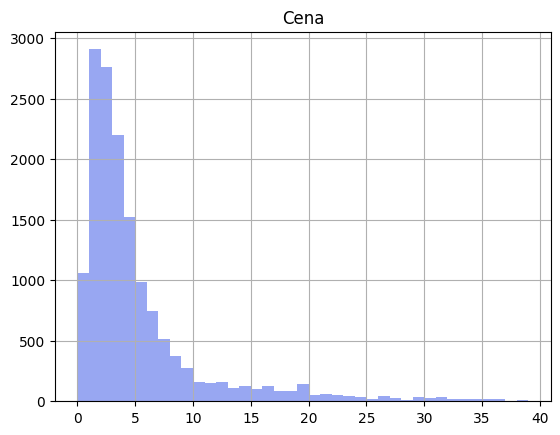

In [7]:
izdelki = pd.read_csv("data/izdelki.csv")
izdelki.drop(columns="Promocijska cena").describe()
izdelki.hist("Cena", bins = range(0,40,1), color = "#98a7f2")

Vidimo, da je povpre[ch]na cena v Mercatorju 6.8 EUR (po redni ceni). Ve[ch]ina izdelkov je cenej[sh]ih od 5 evrov, ampak je tudi nekaj ekstremnih vrednosti, ki nam malo kvarijo povpre[ch]je. Le upamo lahko, da to niso [zh]ivila ampak morda kak[sh]ni ra[ch]unalniki (imamo tudi izdelke dra[zh]je od 40 EUR, ki jih ni na grafu). Promocijske cene izdelkov si bomo ogledali pozneje, saj v primeru ko ni promocije, je vrednost v tabeli `0.0`, kar bi tu kvarilo povpre[ch]je, sicer pa bomo opazili da je efekt zanemarljivo majhen. Recimo, da nas zanima katera znamka je najugodnejsa:

In [8]:
izdelki.groupby("Znamka").agg("Cena").mean().sort_values()

Znamka
PRIME                 0.300000
BANANKO               0.390000
ZOTT KAFFEE GOLD      0.390000
FALLINI               0.430000
ZOTT LIEGEOIS         0.490000
                       ...    
BLIST VALJEVO       219.990000
MAMIBOT             259.990000
ROWENTA             293.323333
ASUS                379.990000
AVENLI              446.596000
Name: Cena, Length: 1876, dtype: float64

V povpre[ch]ju sta najcenej[sh]i torej znamki `Prime` ter  `Zott Kaffe Gold`, najdra[zh]ji pa `Asus` in `Avenli`, prodajalca ra[ch]unalnikov in pa bazenov. Nas seveda najbolj zanimajo prodajalci hrane, da bomo lahko izvedli povezavo z Okusno.Je ;). Morda bolj kot po znamki je smiselno filtriranje po kategoriji, [ch]eprav so tudi tu rezultati na[ch]eloma dokaj predvidljivi. 

In [9]:
izdelki.groupby("Kategorija").agg("Cena").mean().sort_values()

Kategorija
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAGEN               0.656667
 VANILIJ SLADKOR; PECILNI PRAŠEK                                          0.676875
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAGEN      0.690000
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAG                 0.790000
 NEGAZIRANE VODE Z DODATKI                                                0.876364
                                                                           ...    
 ELEKTRIČNE ZOBNE ŠČETKE                                                103.272000
 OGREVANJE                                                              113.323333
 POTOVANJE                                                              149.980000
 TELEVIZORJI                                                            299.990000
 BAZENI IN BAZENSKA TEHNIKA                                             602.492500
Name: Cena, Length: 470, dtype: float64

Opala, izgleda da so nekatere kategorije bile na spletni strani narobe podane, in sicer niso bile pravilno lo[ch]eni med seboj, povrh vsega pa so napisane v napa[ch]no smer. O napaki sem [zh]e obvestil Mercatorjevo IT podporo, in po treh delovnih dneh brez odgovora sem zadevo predal v roke lokalne policije. Prekr[sh]nike lahko izbri[sh]mo iz tabele:

In [10]:
izdelki = izdelki[izdelki["Kategorija"] != "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAGEN"]
izdelki = izdelki[izdelki["Kategorija"] != "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAGEN"]
izdelki = izdelki[izdelki["Kategorija"] != "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAG"]
izdelki = izdelki[izdelki["Kategorija"] != "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAG"]
izdelki.groupby("Kategorija").agg("Cena").mean().sort_values()

Kategorija
VANILIJ SLADKOR; PECILNI PRAŠEK      0.676875
NEGAZIRANE VODE Z DODATKI            0.876364
GAZIRANE VODE Z DODATKI              1.006667
PEKOVSKO PECIVO                      1.036383
KVAS                                 1.094286
                                      ...    
ELEKTRIČNE ZOBNE ŠČETKE            103.272000
OGREVANJE                          113.323333
POTOVANJE                          149.980000
TELEVIZORJI                        299.990000
BAZENI IN BAZENSKA TEHNIKA         602.492500
Name: Cena, Length: 466, dtype: float64

Kot bi morda pri[ch]akovali so najcenej[sh]i manj[sh]i pekovski izdelki ter voda, najdra[zh]ja pa je elektronika ter kot je prej[sh]nja tabela nakazovala, bazeni. Mogo[ch]e bi bila koristna vizualizacija z besednimi oblaki, da dobimo celotno sliko. Spodnja slika prikazuje najpogostej[sh]e kategorije; ve[ch]je kot je besedilo, vec izdelkov je v tej kategoriji. Vidimo, da prevladujejo [ch]okolada, prehranska dopolnila in deodoranti.

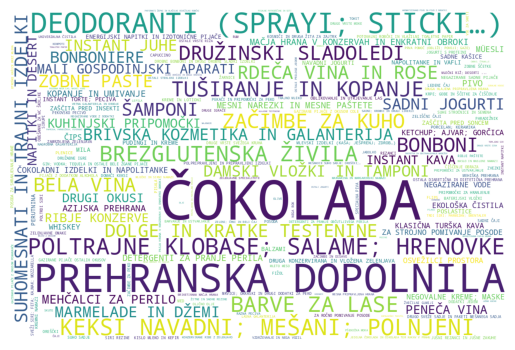

In [12]:
wordcloud = WordCloud(width=1200, height=800,background_color="white").generate_from_frequencies(izdelki["Kategorija"].value_counts())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Sinteza sinteza

Z izbranim receptom in informacijami o cenah sestavin imamo vse potrebne podatke za izra[ch]un cen jedi. Po tem koraku nam ne preostane ni[ch] drugega kot da se odpravimo naravnost v kuhinjo. No pa se povzpnimo na vrh dramskega trikotnika te seminarske naloge in ugotovimo katere jedi so najcenej[sh]e za pripravo, katere so najdra[zh]je, in vse vmes.

In [ ]:
import utility as ut

# pomozna funkcija da ugotovimo podobnost stringov
# razdeli stringe na besede in primerja podobnost besed (drugace dobimo absurdne rezultate, npr. "olivnega olja" matcha z "Hladilna torba")


def similar(a, b):
    r = 0
    bb = list(b.strip().split())
    for i in a.strip().split():
        for j in bb:
            cnt = 0
            # primerja podobnost prefixov besed v stringu (hevristicna resitev)
            for k in range(min(len(i), len(j))):
                if i[k] != j[k]:
                    break
                cnt += 1
            if cnt > 3:
                r += cnt*cnt
    return r


f = open("data/cene.csv", "w")
f.write("Ime jedi,Cena,Promocijska cena\n")
default_cena = 1  # default parameter ce ne najdemo nobenega podobnega izdelka
# cachamo parsanje izdelkov (program gre iz ~100min -> ~15min)
izd_itr = list(izdelki.iterrows())
# za vsako jed gremo cez vse sestavine in jim dolocimo ceno
for _, recepti_row in recepti.iterrows():
    csv = recepti_row["CSV"]
    # dobimo vse sestavine
    sestavine = pd.read_csv("data/recepti_sestavine/" + csv + ".csv")
    skupna_cena = 0.0
    skupna_promocijska_cena = 0.0
    # iz imena sestavine najdemo najblizji match v tabeli izdelkov
    for _, row in sestavine.iterrows():
        ime_sestavine = row["Ime sestavine"]
        kolicina = row["Kolicina"]
        enota = row["Enota"]
        # najdi match
        best_match = 0.6  # neka zacetna toleranca
        best_cena = default_cena
        best_prom_cena = default_cena
        for i, r in izd_itr:
            if enota != r["Enota"]:
                continue  # ce nista v istih enotah nadaljujemo
            sim = similar(r["Ime izdelka"], ime_sestavine)
            if sim < best_match:
                continue  # ugotovimo podobnost, ce je slabsa od trenutnega najboljsega nadaljujemo
            best_match = sim
            # ce je promocijska cena 0.0, ni promocije
            prom_cena_izdelka = r["Promocijska cena"]
            if prom_cena_izdelka == 0.0:
                prom_cena_izdelka = r["Cena"]
            # prioriteta je najblizji zadetek, ce je vec enakih gledamo najnizjo ceno
            if sim > best_match:
                best_cena = r["Cena"] * kolicina
                best_prom_cena = r["Promocijska cena"] * kolicina
            else:
                best_cena = min(best_cena, r["Cena"] * kolicina)
                best_prom_cena = min(
                    best_prom_cena, r["Promocijska cena"] * kolicina)

        skupna_cena += best_cena
        skupna_promocijska_cena += best_prom_cena
    # shranimo ceni za to jed v csv
    f.write(ut.arr_to_csv([recepti_row["Ime jedi"],
            skupna_cena, skupna_promocijska_cena]))
f.close()

Z izvedbo zgornje celice pridobimo informacije o cenah ki se po privzeti vrednosti zapise v `cene.csv`. Ker je izvedba programa v Pythonu dokaj po[ch]asna, priporo[ch]am uporabo C++ verzijo, ve[ch] informacij v `README.md`. Na kakr[sh]enkoli na[ch]in generiramo datoteko, jo lahko brez te[zh]av nadaljne analiziramo. 

Povpre[ch]na cena je: 9.44 EUR
Povpre[ch]na promocijska cena je: 9.37 EUR


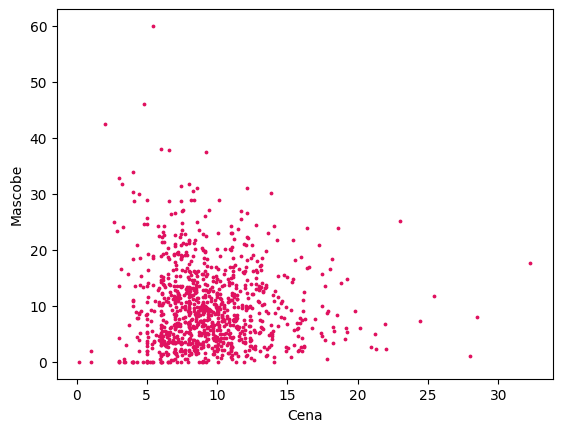

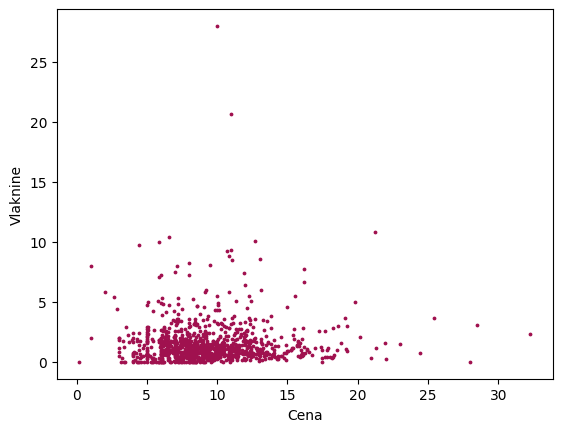

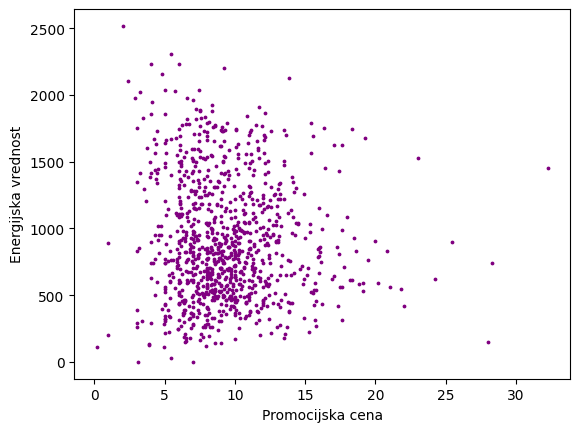

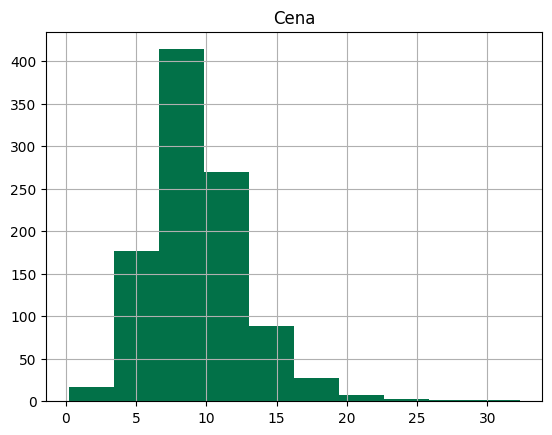

In [13]:
cene = pd.read_csv("data/cene.csv")
recepti = pd.read_csv("data/recepti.csv") # da ni potreben reload receptov zgoraj vsakic ko pozenemo to celico
recepti = recepti.merge(cene)
recepti.plot.scatter(x="Cena",y="Mascobe",s=3, color = "#e0115f")
recepti.plot.scatter(x="Cena",y="Vlaknine",s=3, color = "#a0114f")
recepti.plot.scatter(x="Promocijska cena",y="Energijska vrednost",s=3, color = "purple")
recepti.hist("Cena", color = "#027148")
print("Povpre[ch]na cena je: " + "{:.2f}".format(recepti["Cena"].mean()) + " EUR")
print("Povpre[ch]na promocijska cena je: "+ "{:.2f}".format(recepti["Promocijska cena"].mean()) + " EUR")

Presentljivo bi lahko trdili da ni povezave med ceno/promocijsko ceno jedi in njeno energijsko vrednostjo oz. koli[ch]ino vsebovanih hranilnih snovi. Vse vrednosti se dokaj dobro prekrivajo z histogramom cen jedi, varianco med njimi lahko razlo[zh]imo s tem, da je to[ch]k v nekaterih intervalih preprosto ve[ch]. Povpre[ch]na cena jedi je okoli 9 evrov in pol, za kar bi lahko krivili inflacijo. Je pa tudi res da nekatere sestavine (npr. poper etc.) kupimo enkrat za recimo 2 evra in ga potem uporabimo ne[sh]teto jedeh. Torej ob predpostavki povsem sferi[ch]nega, popolnoma praznega hladilnika (in shrambe) je cena ene jedi vi[sh]ja kot bi bila sicer.

Za mitigacijo tega bi lahko definirali mno[zh]ico sestavin, ki jih nebi upo[sh]tevali v izra[ch]unu, ampak bi spet naleteli na prej[sh]nji "matching" problem. Beseda o tem: stestiral sem tudi uporabo drugih funkcij, drugih na[ch]inov za ocenjevanje razlike med sestavinami in izdelki; razli[ch]ne pythonske funkcije, preprosta Levensteinova razdalja ipd., a ni ni[ch] obrodilo bolj[sh]ih rezultatov kot zgornja hevristika, pogosto za ceno podal[sh]anja [ch]asa izvajanja ("edit distance" podalj[sh]a [ch]as za ~3x). Seveda zgornja funkcija ni popolna, ob[ch]asno se zgodi da ne najde stvari ki so v bazi ali pa da najde nekaj vsebinsko druga[ch]nega (npr. "Namaz z bu[ch]nimi semeni" popar[ch]ka z "bu[ch]nega olja"). Razvoj nadaljnih re[sh]itev teh problemov prebu[sh][ch]am v razmislek bralcem.

# Zaklju[ch]ek

Ugotovili smo torej da obstaja pozitivna korelacija med energijsko vrednostjo jedi in vsebnostjo ma[sh][ch]ob, ogljikovih hidratov in vlaknin, ni pa korelacije za beljakovine. Prav tako ni korelacije med [ch]asom kuhanja in kalori[ch]no vrednostjo, je pa med dol[zh]ino navodil in pa [ch]asom kuhanja - zahtevnej[sh]i kot je recept, dlje ga kuhamo. Ugotovljali smo tudi proliferi[ch]nost avtorjev Okusno.Je in [ch]e je kak[sh]ne so razlike med njihovimi recepti. 

Nato smo si pogledali povpre[ch]no ceno Mercatorjevih izdelkov ter tako nadra[zh]je kot tudi najcenej[sh]e kategorije izdelkov. Rezultate smo povzeli s informativno vizualizacijo. Za konec pa smo pridobljene podatke iz Mercatorjeve spletne trgovine in Okusno.Je zdru[zh]ili, da smo ugotovili katere jedi so cenovno najugodnej[sh]e ter kak[sh]ne so njihove kalori[ch]ne vrednosti.

Potrebno je poudariti omejitve take analize, saj je iskanje izdelkov med razli[ch]nimi spletnimi stranmi sami po sebi nezanesljivo, zato so tudi pridobljeni podatki nekoliko nezanesljivi, a predstavljajo dobro osnovo na kateri lahko gradimo morebitno prihodnjo analizo.